C:\Users\dell\AppData\Local\Temp\ipykernel_13240\3709436801.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: " ".join(x))


The Dark Knight
The Dark Knight Rises
Batman
Batman & Robin
Batman


C:\Users\dell\AppData\Local\Temp\ipykernel_13240\3709436801.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=recommended_movies, palette='viridis')


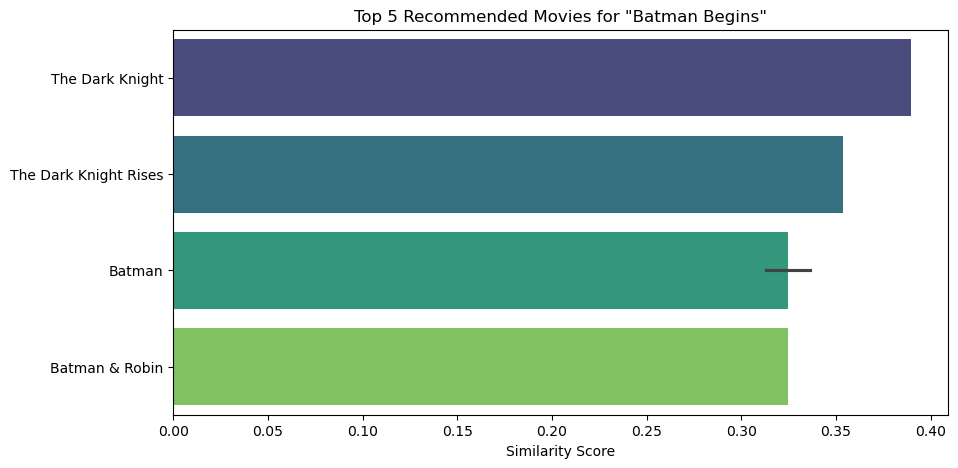

In [10]:
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.porter import PorterStemmer
import ast
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
movies= pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')
movies=movies.merge(credits,on='title')
movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.isnull().sum()
movies.dropna(inplace=True)
#check for dublicate raws

movies.duplicated().sum()
def convert(obj):
    l=[]
    for i in  ast.literal_eval(obj):
        l.append(i['name'])
    return l
movies['genres']=movies['genres'].apply(convert)
movies['keywords']=movies['keywords'].apply(convert)
#Convert JSON Strings to Python Objects
def convert3(obj):
    l=[]
    counter=0
    for i in  ast.literal_eval(obj):
        if counter!=3:
            l.append(i['name'])
            counter+=1
        else:
            break
    return l
movies['cast']=movies['cast'].apply(convert3)
def fetch_director(obj):
    l=[]
    for i in  ast.literal_eval(obj):
        if i['job']=='Director':
            l.append(i['name'])
            break
    return l
movies['crew']=movies['crew'].apply(fetch_director)
movies['overview']=movies['overview'].apply(lambda x:x.split())
#strip white space for all column name
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies['overview']=movies['overview'].apply(lambda x:[i.replace(" ","") for i  in  x])
#Create a 'tags' Column
movies['tags']=movies['genres']+movies['keywords']+movies['cast']+movies['crew']+movies['overview']
new_df=movies[['movie_id','title','tags']]
new_df['tags']=new_df['tags'].apply(lambda x: " ".join(x))
cv = CountVectorizer(max_features=5000,stop_words='english')
vectors=cv.fit_transform(new_df['tags']).toarray()
cv.get_feature_names_out()
ps=PorterStemmer()
def stem(text):
    y=[]
    for i in text .split():
        y.append(ps.stem(i))
    return " ".join(y)
similarity=cosine_similarity(vectors)
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda c:c[1])[1:6]
def recommend(movie):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances = similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda c:c[1])[1:6]
    for i in movies_list:
        # print(i)
        print(new_df.iloc[i[0]].title)
     
recommend('Batman Begins')
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda c: c[1])[1:6]
    recommended_movies = []
    scores = []
    for i in movies_list:
        recommended_movies.append(new_df.iloc[i[0]].title)
        scores.append(i[1])
    return recommended_movies, scores

recommended_movies, scores = recommend('Batman Begins')


plt.figure(figsize=(10, 5))
sns.barplot(x=scores, y=recommended_movies, palette='viridis')
plt.xlabel('Similarity Score')
plt.title('Top 5 Recommended Movies for "Batman Begins"')
plt.show()



   